In [ ]:
from google.colab import drive
drive.mount('gdrive')
%cd /content/gdrive/'My Drive'/Dataset/Assignment4

Mounted at gdrive
/content/gdrive/My Drive/Dataset/Assignment4


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
iris = pd.read_csv('Iris.csv')
del iris['Id']
print(iris)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Text(0.5, 1.0, 'scatter')

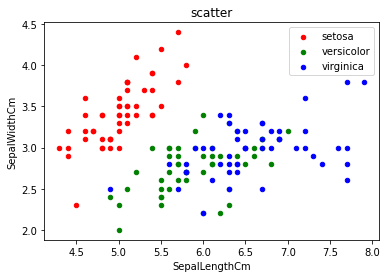

In [ ]:
# scatter plot using pandas (EXTRA)

ax = iris[iris.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

In [ ]:
iris["Species"].replace("Iris-setosa", 0.0 , inplace=True)
iris["Species"].replace("Iris-versicolor", 1.0, inplace=True)
iris["Species"].replace("Iris-virginica", 2.0, inplace=True)

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
Y = iris[['Species']].copy()
X = iris.drop(['Species'], axis = 1)

In [ ]:
# TRAIN TEST SPLIT FUNC
def traintestsplit(df):
  shuffle = np.random.permutation(len(df))
  test_size = int(len(df) * 0.3)
  test_aux = shuffle[:test_size]
  train_aux = shuffle[test_size:]
  TRAIN_DF =df.iloc[train_aux]
  TEST_DF = df.iloc[test_aux]
  return TRAIN_DF, TEST_DF

In [ ]:
train, test = traintestsplit(iris)
train.reset_index(inplace = True)
test.reset_index(inplace = True)  
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
xtrain = train[features]
xtest = test[features]
ytrain = train.Species
ytest = test.Species
print(xtrain)
print(ytrain)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              6.0           3.4            4.5           1.6
1              6.3           2.8            5.1           1.5
2              4.9           2.5            4.5           1.7
3              4.6           3.2            1.4           0.2
4              7.6           3.0            6.6           2.1
..             ...           ...            ...           ...
100            5.0           3.3            1.4           0.2
101            6.4           2.8            5.6           2.2
102            6.3           2.5            4.9           1.5
103            4.4           3.2            1.3           0.2
104            6.9           3.1            5.4           2.1

[105 rows x 4 columns]
0      1.0
1      2.0
2      2.0
3      0.0
4      2.0
      ... 
100    0.0
101    2.0
102    1.0
103    0.0
104    2.0
Name: Species, Length: 105, dtype: float64


In [ ]:
#There are 3 different clusters in the Dataset and we have 4 features that we can feed the K-Means model.
distortions = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(iris)
  distortions.append(kmeanModel.inertia_)

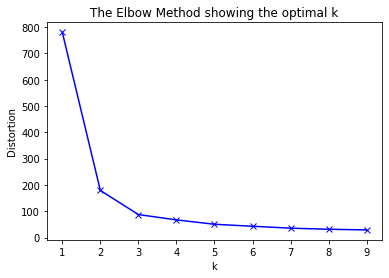

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
km = KMeans(n_clusters = 3)
km.fit(xtrain, ytrain)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print(Y)

     Species
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
..       ...
145      2.0
146      2.0
147      2.0
148      2.0
149      2.0

[150 rows x 1 columns]


Text(0.5, 1.0, 'K_Means')

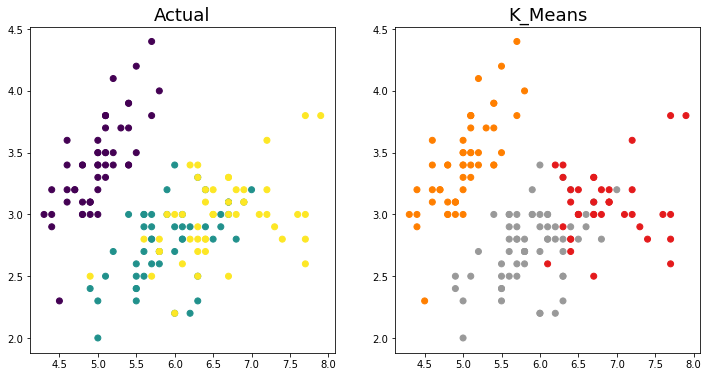

In [ ]:
iris['k_means']=km.predict(X)
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c=iris['Species'])
axes[1].scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c=iris['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

## PCA Try

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardizing the features
pcadata = StandardScaler().fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(pcadata)
print(pca.explained_variance_)

[2.93035378 0.92740362]


In [ ]:
#print(principalComponents)
pcadf = pd.DataFrame(data = principalComponents, columns = ['col1', 'col2'])
print(pcadf)

         col1      col2
0   -2.264542  0.505704
1   -2.086426 -0.655405
2   -2.367950 -0.318477
3   -2.304197 -0.575368
4   -2.388777  0.674767
..        ...       ...
145  1.870522  0.382822
146  1.558492 -0.905314
147  1.520845  0.266795
148  1.376391  1.016362
149  0.959299 -0.022284

[150 rows x 2 columns]


Text(0.5, 1.0, 'K_Means')

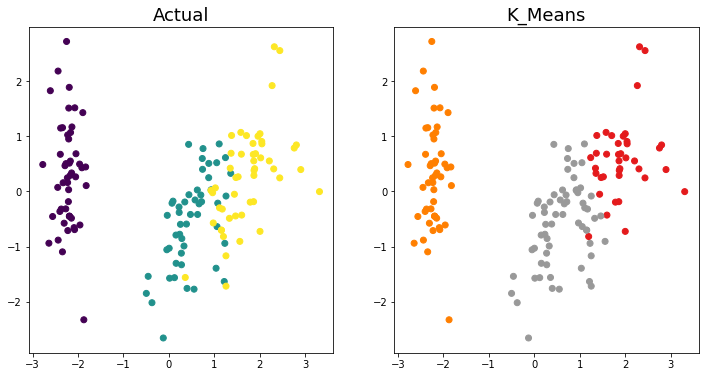

In [ ]:
pcadf['k_means']=km.predict(X)
pcadf['Species'] = iris['Species']
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(pcadf['col1'], pcadf['col2'], c=pcadf['Species'])
axes[1].scatter(pcadf['col1'], pcadf['col2'], c=pcadf['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

In [ ]:
def findAccuracy(ytest, y_predict):
  ptr = 0
  neg = 0
  total = len(ytest)
  for i in ytest:
    if(i != y_predict[ptr]):
      neg+=1
    ptr+=1
  return (total - neg)/total

In [ ]:
print(findAccuracy(xtrain, ytrain)*100)

96.19047619047619


In [ ]:
print(findAccuracy(xtest, ytest)*100)

91.11111111111111
